# Part 1

In [94]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
dataset = pd.read_csv(r"C:/Users/Asus/Downloads/Mall_Customers.csv")

In [96]:
dataset.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [97]:
dataset.shape

(200, 5)

In [98]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [99]:
dataset.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [100]:
x = dataset.iloc[:, [3,4]].values

In [101]:
from sklearn.cluster import KMeans

In [102]:
wcss = []

for i in range (1,11):
    kmeans = KMeans(n_clusters =i , init ="k-means++", random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
plt.plot(range(1,11), wcss)
plt.title("elbow metod")
plt.xlabel("no of cluster")
plt.ylabel("wcss")
plt.show()

In [103]:
kmeansmodel = KMeans(n_clusters=5, init="k-means++", random_state=0)
y_kmeans = kmeansmodel.fit_predict(x)

AttributeError: 'KMeans' object has no attribute 'cluster_centers_'

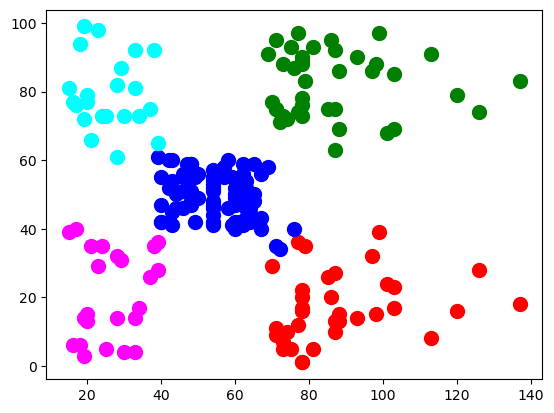

In [80]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s= 100, c ="red", label= "cluster 1")
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s= 100, c ="blue", label= "cluster 2")
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s= 100, c ="green", label= "cluster 3")
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s= 100, c ="cyan", label= "cluster 4")
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s= 100, c ="magenta", label= "cluster 5")

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c="yellow", label="centroids")
plt.title("müşteri klasları")
plt.xlabel("yıllık gelir")
plt.ylabel("harcama skoru")
plt.legend()
plt.show()

# Part 2

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [82]:
x1 = np.random.normal(25,5,1000) 
y1 = np.random.normal(25,5,1000)

x2 = np.random.normal(55,5,1000)
y2 = np.random.normal(60,5,1000)

x3 = np.random.normal(55,5,1000)
y3 = np.random.normal(15,5,1000)

In [83]:
x = np.concatenate((x1,x2,x3),axis = 0) 
y = np.concatenate((y1,y2,y3),axis = 0)

In [84]:
dictionary = {"x":x,"y":y}

In [85]:
data = pd.DataFrame(dictionary)

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       3000 non-null   float64
 1   y       3000 non-null   float64
dtypes: float64(2)
memory usage: 47.0 KB


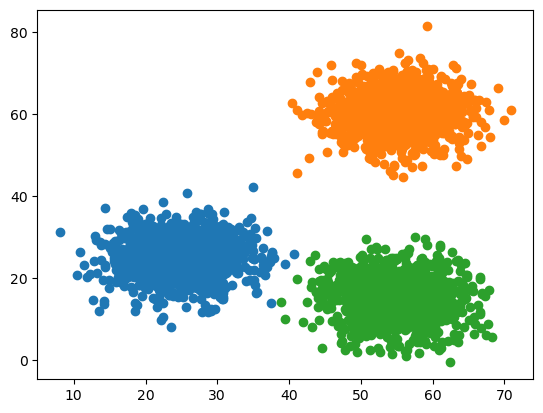

In [87]:
plt.scatter(x1,y1)               
plt.scatter(x2,y2)
plt.scatter(x3,y3)
plt.show()

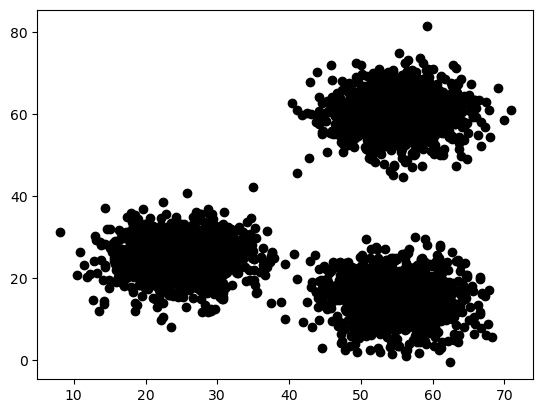

In [88]:
plt.scatter(x1,y1,color = "black")
plt.scatter(x2,y2,color = "black")
plt.scatter(x3,y3,color = "black")
plt.show();

In [1]:
from sklearn.cluster import KMeans
wcss = []

for k in range(1,15):
    kmeans = KMeans(n_clusters=k) 
    kmeans.fit(data)             
    wcss.append(kmeans.inertia_)  
    
plt.plot(range(1,15),wcss)
plt.xlabel("number of k (cluster) value")
plt.ylabel("wcss")
plt.title("Elbow Method")
plt.grid()
plt.show()

NameError: name 'data' is not defined

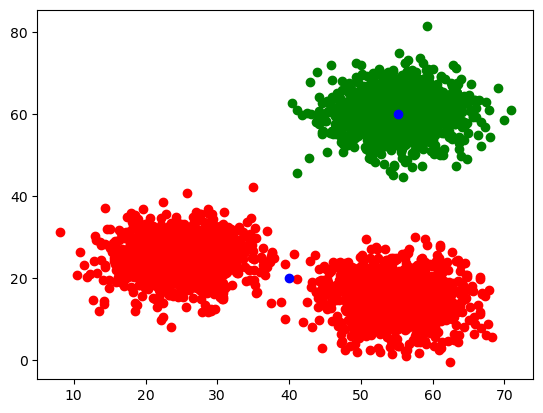

In [93]:
kmeans2 = KMeans(n_clusters=2)
clusters = kmeans2.fit_predict(data) 

data["label"] = clusters

plt.scatter(data.x[data.label == 0 ],data.y[data.label == 0],color = "red")   
plt.scatter(data.x[data.label == 1 ],data.y[data.label == 1],color = "green") 
plt.scatter(kmeans2.cluster_centers_[:,0],kmeans2.cluster_centers_[:,1],color = "blue") 
plt.show()

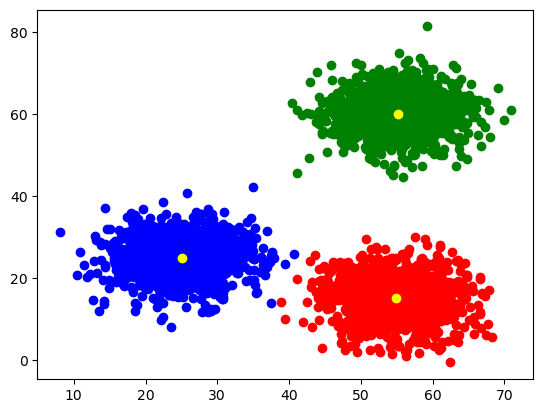

In [92]:
kmeans2 = KMeans(n_clusters=3)
clusters = kmeans2.fit_predict(data)

data["label"] = clusters

plt.scatter(data.x[data.label == 0 ],data.y[data.label == 0],color = "red")  
plt.scatter(data.x[data.label == 1 ],data.y[data.label == 1],color = "green") 
plt.scatter(data.x[data.label == 2 ],data.y[data.label == 2],color = "blue")  
plt.scatter(kmeans2.cluster_centers_[:,0],kmeans2.cluster_centers_[:,1],color = "yellow")  
plt.show()

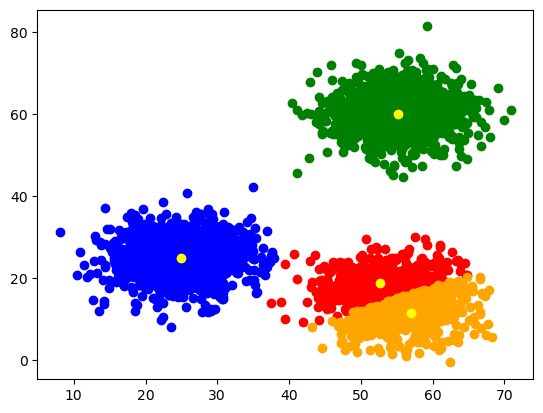

In [91]:
kmeans2 = KMeans(n_clusters=4)
clusters = kmeans2.fit_predict(data)

data["label"] = clusters

plt.scatter(data.x[data.label == 0 ],data.y[data.label == 0],color = "red")    
plt.scatter(data.x[data.label == 1 ],data.y[data.label == 1],color = "green")  
plt.scatter(data.x[data.label == 2 ],data.y[data.label == 2],color = "blue")   
plt.scatter(data.x[data.label == 3 ],data.y[data.label == 3],color = "orange") 
plt.scatter(kmeans2.cluster_centers_[:,0],kmeans2.cluster_centers_[:,1],color = "yellow")
plt.show()

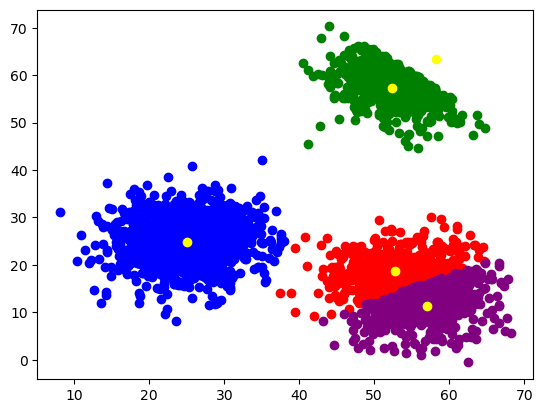

In [90]:
kmeans2 = KMeans(n_clusters=5)
clusters = kmeans2.fit_predict(data)

data["label"] = clusters

plt.scatter(data.x[data.label == 0 ],data.y[data.label == 0],color = "red")    
plt.scatter(data.x[data.label == 1 ],data.y[data.label == 1],color = "green")  
plt.scatter(data.x[data.label == 2 ],data.y[data.label == 2],color = "blue")  
plt.scatter(data.x[data.label == 4 ],data.y[data.label == 4],color = "purple") 
plt.scatter(kmeans2.cluster_centers_[:,0],kmeans2.cluster_centers_[:,1],color = "yellow") 
plt.show()